# SEABORN 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
# data from: https://ourworldindata.org/coronavirus-data
covid = pd.read_csv("owid-covid-data.csv")
display(covid.head())

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
0  ...          1.337        1803.987              NaN         597.029   
1  ...          1.337        1803.987              NaN         597.029   
2  ...          1.337        1803.987              NaN         597.029   
3  ...          1.337        1803.987              NaN         597.029   
4  ...          1.337        1803.987              NaN         597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

  hospital_beds_per_thousand  life_expectancy  
0                        0.5            64.83  
1                        0.5            64.83  
2                        0.5            64.83  
3                        0.5            64.83  
4                        0.5            64.83  

[5 rows x 34 columns]

In [3]:
# change date string to datetime format
from datetime import datetime
covid.loc[:,'date'] = pd.to_datetime(covid.loc[:,'date'])

## COVID-19 in Canada

In [4]:
canada = covid[covid['location'] == 'Canada']
canada.head()

iso_code      continent location       date  total_cases  new_cases  \
4981      CAN  North America   Canada 2019-12-31          0.0        0.0   
4982      CAN  North America   Canada 2020-01-01          0.0        0.0   
4983      CAN  North America   Canada 2020-01-02          0.0        0.0   
4984      CAN  North America   Canada 2020-01-03          0.0        0.0   
4985      CAN  North America   Canada 2020-01-04          0.0        0.0   

      total_deaths  new_deaths  total_cases_per_million  \
4981           0.0         0.0                      0.0   
4982           0.0         0.0                      0.0   
4983           0.0         0.0                      0.0   
4984           0.0         0.0                      0.0   
4985           0.0         0.0                      0.0   

      new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
4981                    0.0  ...         10.797       44017.591   
4982                    0.0  ...         10.797       44017.591   
4983                    0.0  ...         10.797       44017.591   
4984                    0.0  ...         10.797       44017.591   
4985                    0.0  ...         10.797       44017.591   

      extreme_poverty  cvd_death_rate  diabetes_prevalence  female_smokers  \
4981              0.5         105.599                 7.37            12.0   
4982              0.5         105.599                 7.37            12.0   
4983              0.5         105.599                 7.37            12.0   
4984              0.5         105.599                 7.37            12.0   
4985              0.5         105.599                 7.37            12.0   

      male_smokers  handwashing_facilities hospital_beds_per_thousand  \
4981          16.6                     NaN                        2.5   
4982          16.6                     NaN                        2.5   
4983          16.6                     NaN                        2.5   
4984          16.6                     NaN                        2.5   
4985          16.6                     NaN                        2.5   

      life_expectancy  
4981            82.43  
4982            82.43  
4983            82.43  
4984            82.43  
4985            82.43  

[5 rows x 34 columns]

In [5]:
# explore data
# check for values that were constant since Dec 31, 2019 to July 14, 2020
for i in canada.columns:
    if len(canada[i].unique()) == 1:
        print(i, ':', canada[i].unique())
    else:
        print("More than 1 value:", i)

iso_code : ['CAN']
continent : ['North America']
location : ['Canada']
More than 1 value: date
More than 1 value: total_cases
More than 1 value: new_cases
More than 1 value: total_deaths
More than 1 value: new_deaths
More than 1 value: total_cases_per_million
More than 1 value: new_cases_per_million
More than 1 value: total_deaths_per_million
More than 1 value: new_deaths_per_million
More than 1 value: total_tests
More than 1 value: new_tests
More than 1 value: total_tests_per_thousand
More than 1 value: new_tests_per_thousand
More than 1 value: new_tests_smoothed
More than 1 value: new_tests_smoothed_per_thousand
More than 1 value: tests_units
More than 1 value: stringency_index
population : [37742157.]
population_density : [4.037]
median_age : [41.4]
aged_65_older : [16.984]
aged_70_older : [10.797]
gdp_per_capita : [44017.591]
extreme_poverty : [0.5]
cvd_death_rate : [105.599]
diabetes_prevalence : [7.37]
female_smokers : [12.]
male_smokers : [16.6]
handwashing_facilities : [nan]
ho

### Barplot of Stringency Index

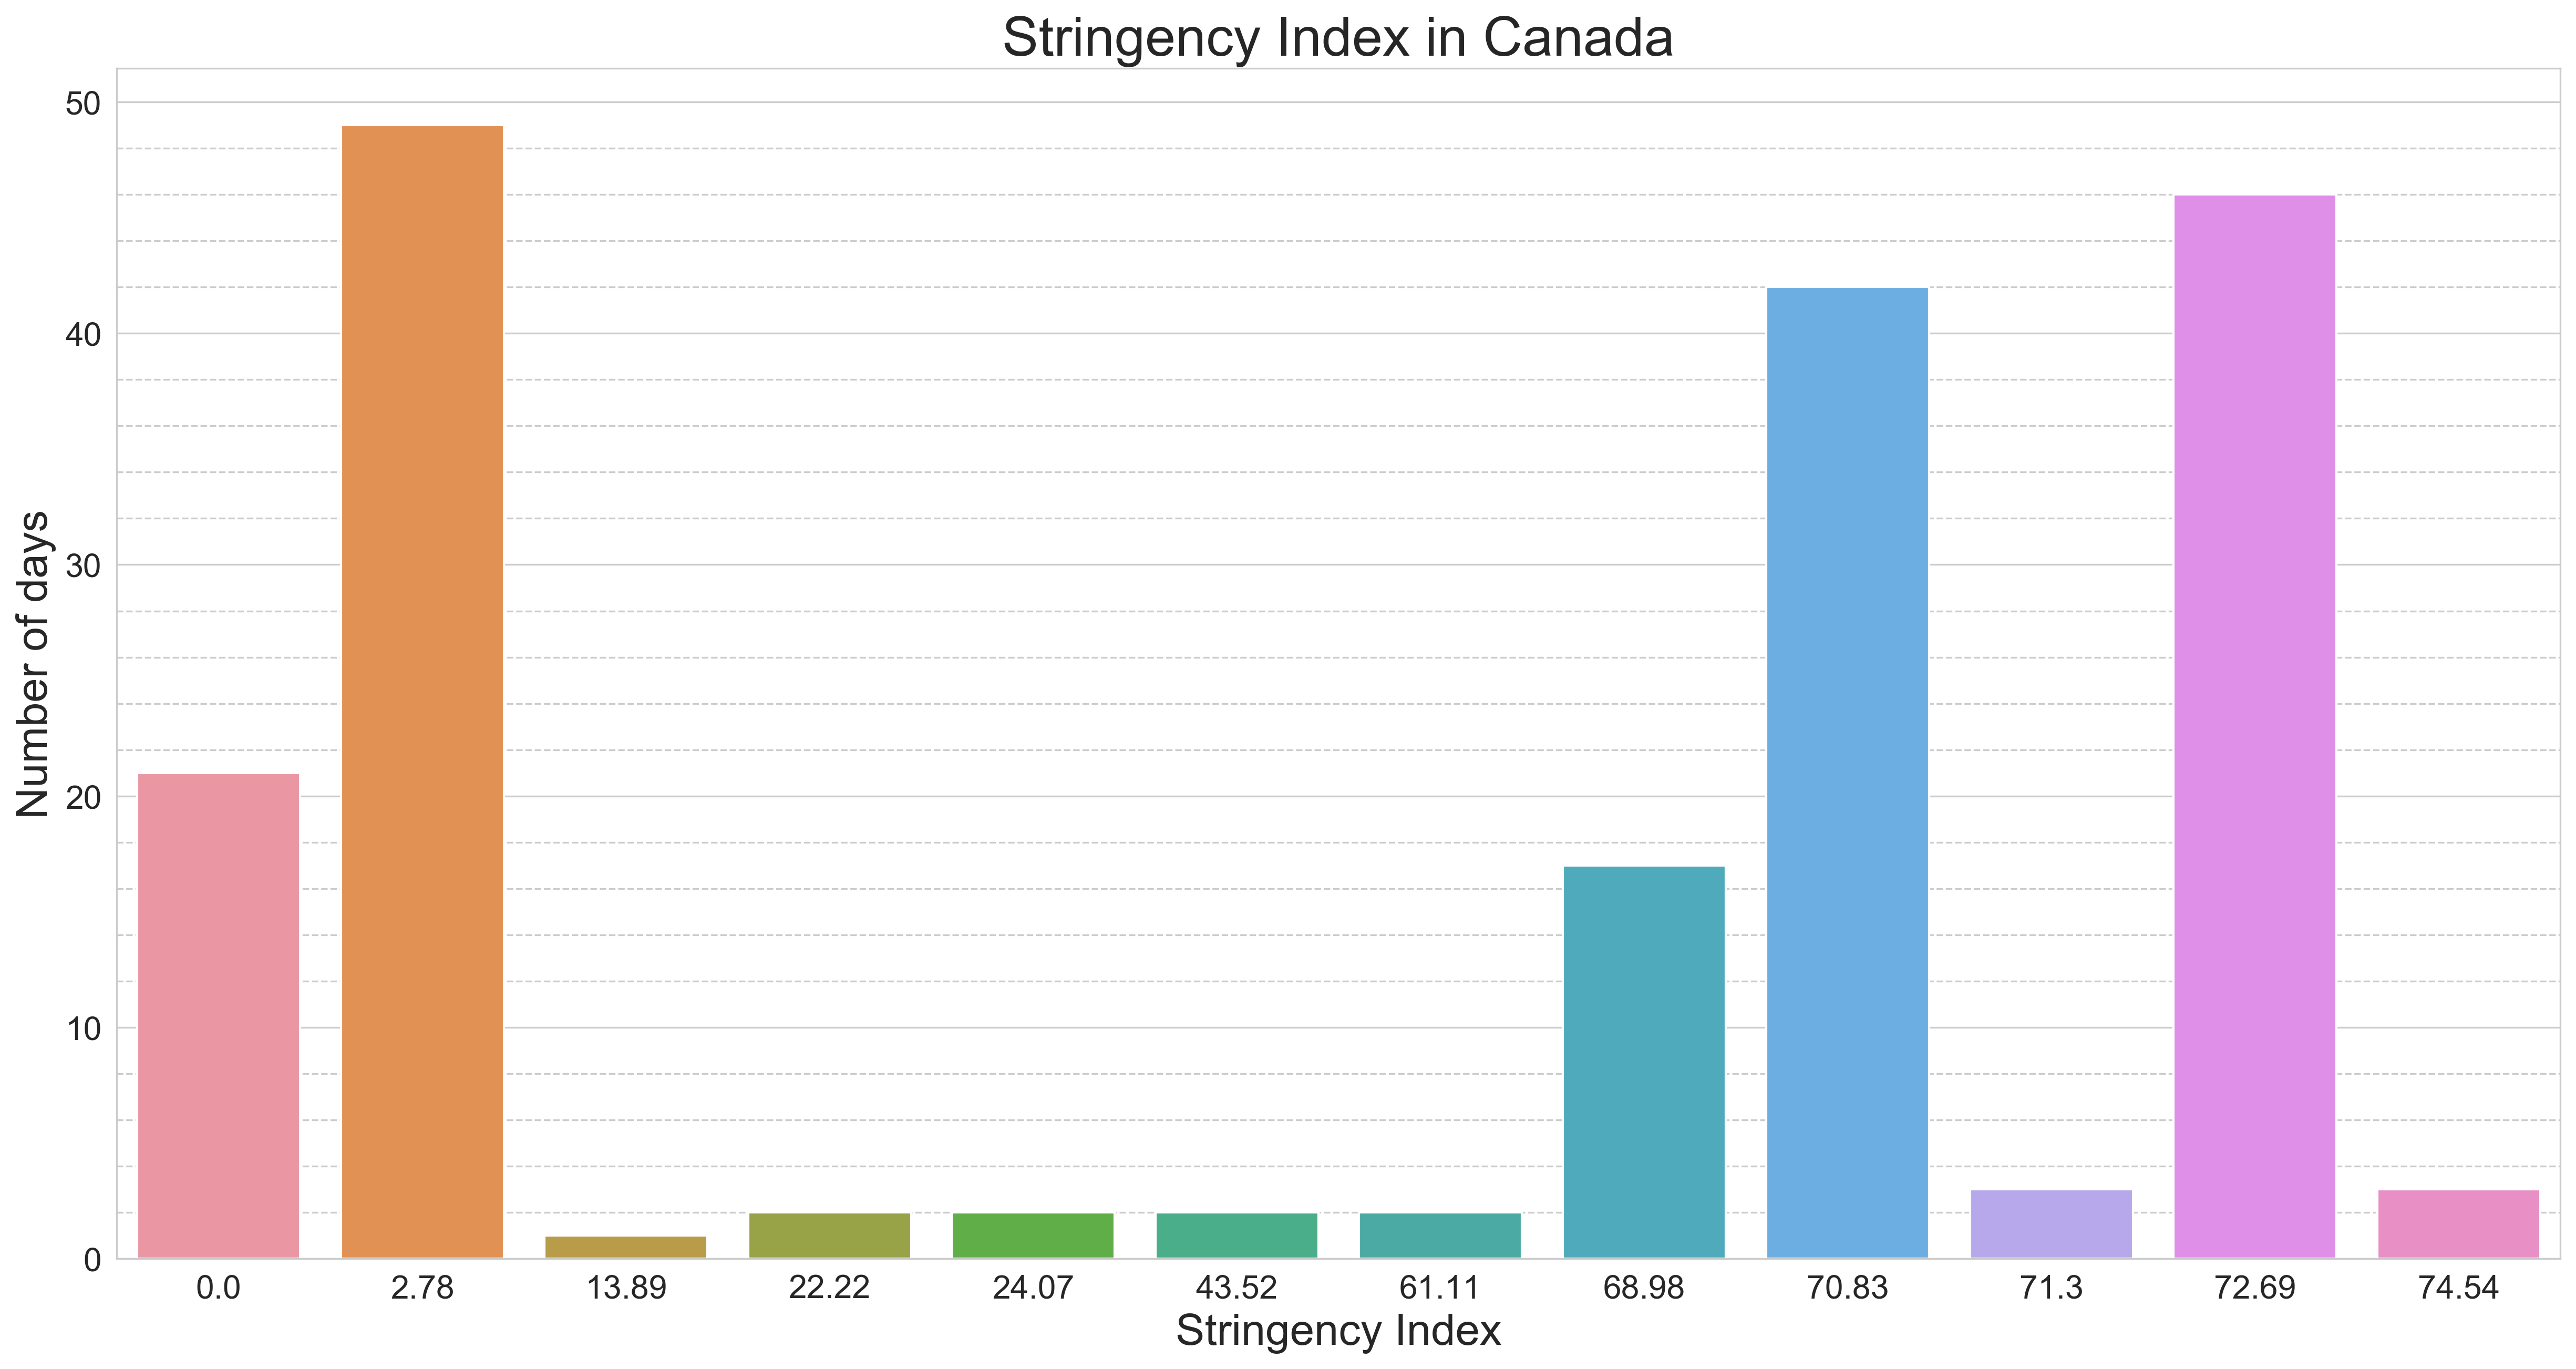

In [6]:
# number of days each stringency index was placed in Canada
sns.set_style('whitegrid')
plt.figure(figsize=(20,10), dpi=300)
sns.countplot(x='stringency_index', data=canada)

# Add title and labels
plt.title('Stringency Index in Canada', fontsize=25)
plt.xlabel(xlabel='Stringency Index', fontsize=20)
plt.ylabel(ylabel='Number of days', fontsize=20)

# set fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = plt.gca()
# Add minor ticks for y-axis in the interval of 2
ax.set_yticks(np.arange(0, 50, 2), minor=True)

# Add major and minor horizontal grid with solid & dashed lines
ax.yaxis.grid(which='major', linestyle='-')
ax.yaxis.grid(which='minor', linestyle='--')

In [7]:
canada['stringency_index'].value_counts().sort_index(ascending = False)

74.54     3
72.69    46
71.30     3
70.83    42
68.98    17
61.11     2
43.52     2
24.07     2
22.22     2
13.89     1
2.78     49
0.00     21
Name: stringency_index, dtype: int64

In [8]:
# North America dataframe
na = covid[covid['continent'] == 'North America']

Number of Countries in North America: 36


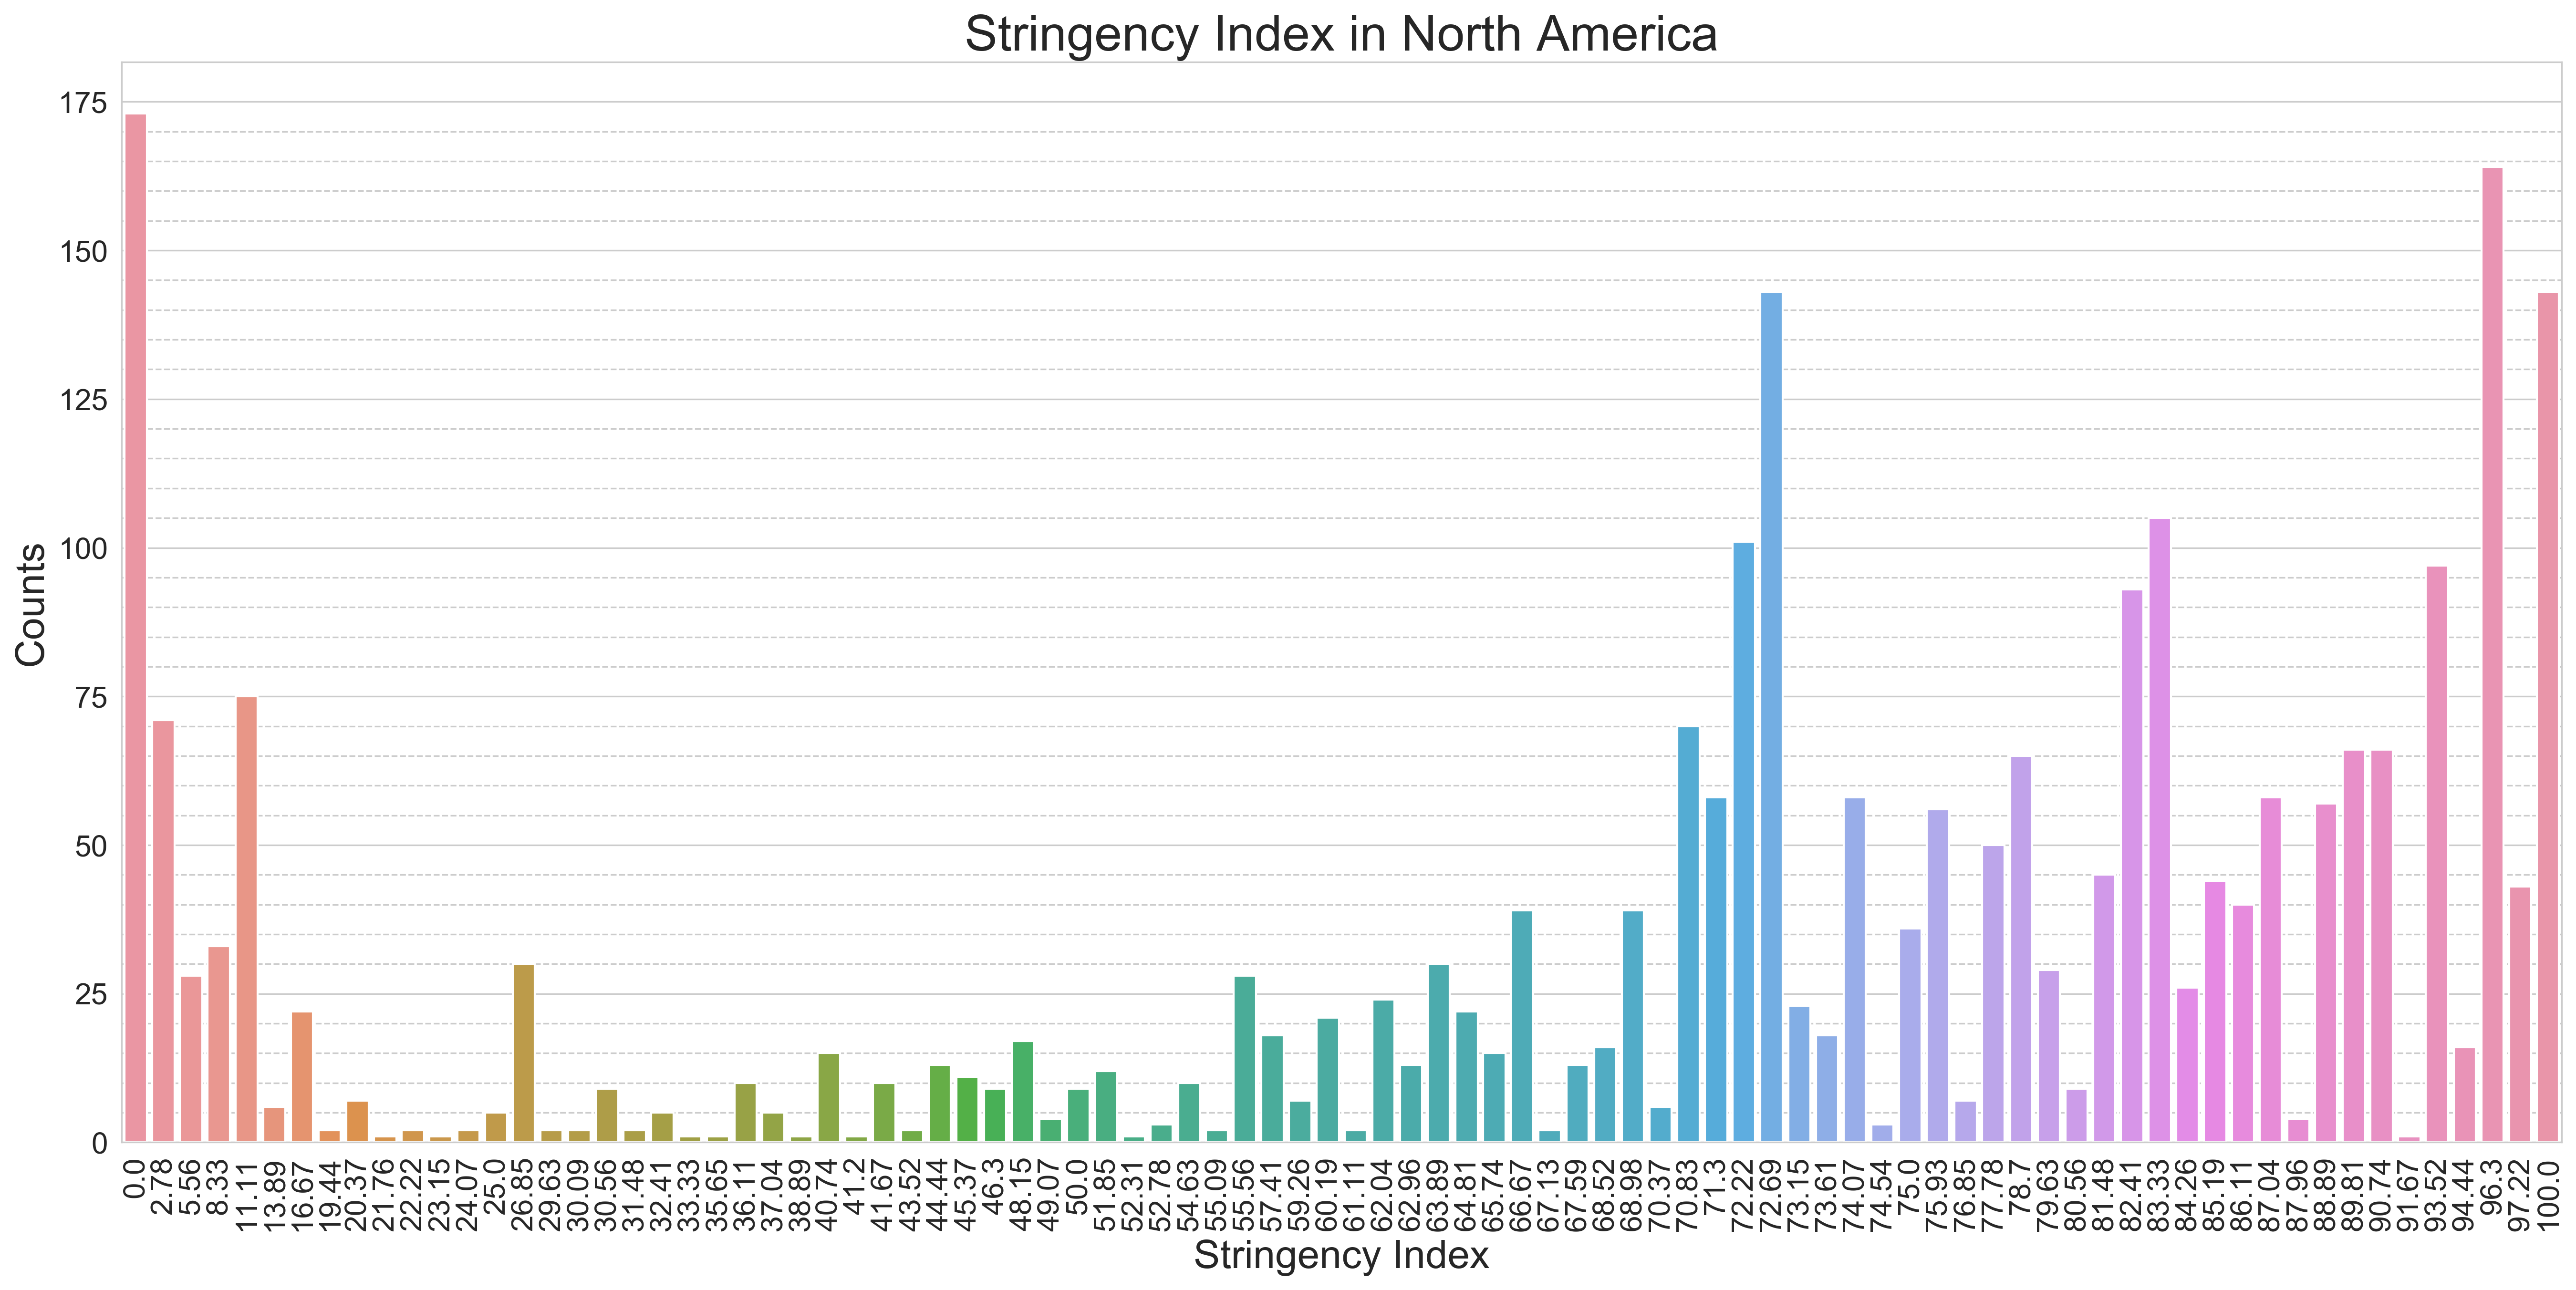

In [9]:
# number of times each stringency index was imposed on 36 countries in North America
plt.figure(figsize=(22,10), dpi=300)
sns.countplot(x='stringency_index', data=na)

# Add title and labels
plt.title('Stringency Index in North America', fontsize=25)
plt.xlabel(xlabel='Stringency Index', fontsize=20)
plt.ylabel(ylabel='Counts', fontsize=20)

# set fontsize for xticks and yticks
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

ax = plt.gca()
# Add minor ticks for y-axis in the interval of 5
ax.set_yticks(np.arange(0, 175, 5), minor=True)

# Add major and minor horizontal grid with solid & dashed lines
ax.yaxis.grid(which='major', linestyle='-')
ax.yaxis.grid(which='minor', linestyle='--')

print('Number of Countries in North America:',covid[covid['continent'] == 'North America']['location'].nunique())

In [10]:
na_si = covid[(covid['continent'] == 'North America') & (covid['stringency_index']>=70.83)]
print('Number of times Stringency Index >=70.83 in North America for all 36 countries:', na_si['stringency_index'].count())

Number of times Stringency Index >=70.83 in North America for all 36 countries: 1794


### Time Series on Stringency Index


C:\Users\dvazq\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


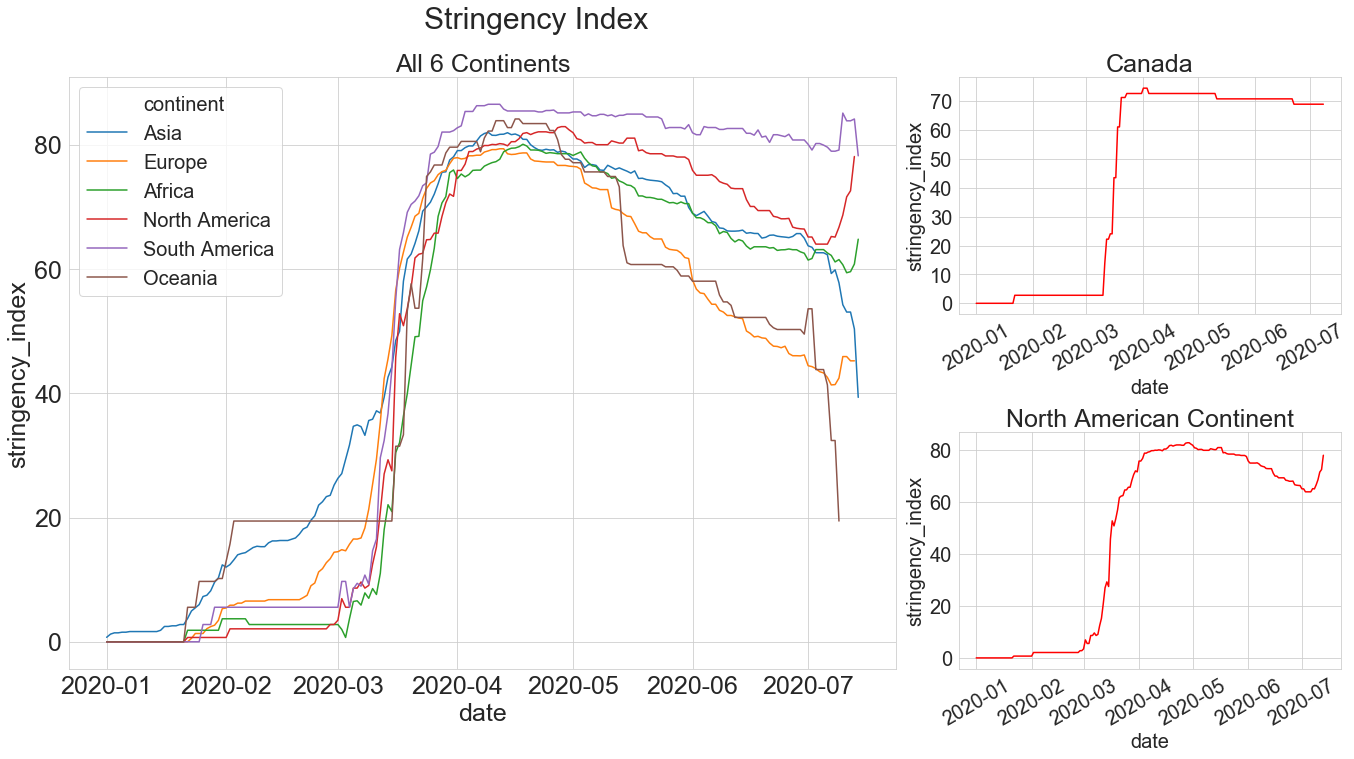

In [11]:
# plot all continents. North America and Canada stringency index as time series
import matplotlib.gridspec as gridspec

# create subplots and set xticks
fig = plt.figure(figsize=(25,10))
gs = gridspec.GridSpec(2,4)

ax1 = plt.subplot(gs[:2,:2])
plt.title('All 6 Continents', fontsize=25)
plt.xlabel('date', fontsize=25)
plt.ylabel('stringency_index', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.rc('legend',fontsize=20)

ax2 = plt.subplot(gs[0,2])
plt.title('Canada', fontsize=25)
plt.xlabel('date', fontsize=20)
plt.ylabel('stringency_index', fontsize=20)
plt.xticks(fontsize=20, rotation=30)
plt.yticks(fontsize=20)

ax3 = plt.subplot(gs[1,2])
plt.title('North American Continent', fontsize=25)
plt.xlabel('date', fontsize=20)
plt.ylabel('stringency_index', fontsize=20)
plt.xticks(fontsize=20, rotation=30)
plt.yticks(fontsize=20)

# line plot of stringency index
sns.lineplot(x='date', y='stringency_index', hue='continent', ci=None, data=covid, ax=ax1)
sns.lineplot(canada['date'], canada['stringency_index'], data=canada, ax=ax2, color='r')
sns.lineplot(na['date'], na['stringency_index'], ci=None, data=na, ax=ax3, color='r')
plt.tight_layout()

# adjust fontsize for all fonts in graphs and add title
fig.suptitle('Stringency Index', fontsize=30, x=0.3, y=1.05)

plt.show()

### COVID-19 Cases and Deaths in Canada

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# create subplots
fig = make_subplots(
    rows=5, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

# add total cases
fig.add_trace(
    go.Scatter(
        x=canada["date"],
        y=canada["total_cases"],
        mode="lines",
        name="Total Cases"
    ),
    row=1, col=1
)

# add total deaths
fig.add_trace(
    go.Scatter(
        x=canada["date"],
        y=canada["total_deaths"],
        mode="lines",
        name="Total Deaths"
    ),
    row=2, col=1
)

# add new cases
fig.add_trace(
    go.Scatter(
        x=canada["date"],
        y=canada["new_cases"],
        mode="lines",
        name="New Cases"
    ),
    row=3, col=1
)

# add new deaths
fig.add_trace(
    go.Scatter(
        x=canada["date"],
        y=canada["new_deaths"],
        mode="lines",
        name="New Deaths"
    ),
    row=4, col=1
)

# add stringency index
fig.add_trace(
    go.Scatter(
        x=canada["date"],
        y=canada["stringency_index"],
        mode="lines",
        name="Stringency Index"
    ),
    row=5, col=1
)

fig.update_layout(
    height=650,
    showlegend=True,
    title="COVID-19 Cases and Deaths in Canada"
)

fig.show()



# Matplotlib

In [13]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [14]:
#Load Data
df = pd.read_csv("owid-covid-data.csv")

In [15]:
df2 = df.groupby(['continent','location']).agg({'new_cases':'sum','new_deaths':'sum', 
                                                'population':'mean',
                                                'new_cases_per_million':'sum',
                                                'handwashing_facilities':'mean',
                                                'hospital_beds_per_thousand':'mean'}).reset_index()

#### 1. Pie Chart

In [16]:
df3 = df2.groupby(['continent'])['new_cases'].sum().reset_index()
df3['new_cases'] = df3['new_cases']/df3['new_cases'].sum()

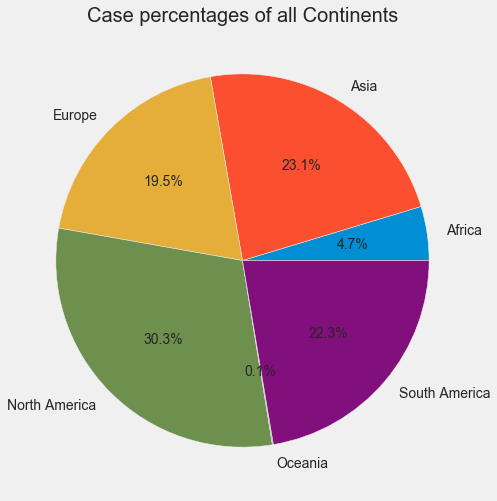

In [17]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,8))
plt.pie(df3['new_cases'],labels=df3['continent'],autopct='%1.1f%%')
plt.title('Case percentages of all Continents',fontsize=20)
plt.show()

#### 2. Histogram of total cases in Asia countries

In [18]:
df2.sort_values(by=['new_cases'],ascending=False,inplace=True)
df4 = df2.head(20)

In [19]:
df4['continent'].value_counts()

Europe           6
Asia             6
South America    4
North America    3
Africa           1
Name: continent, dtype: int64

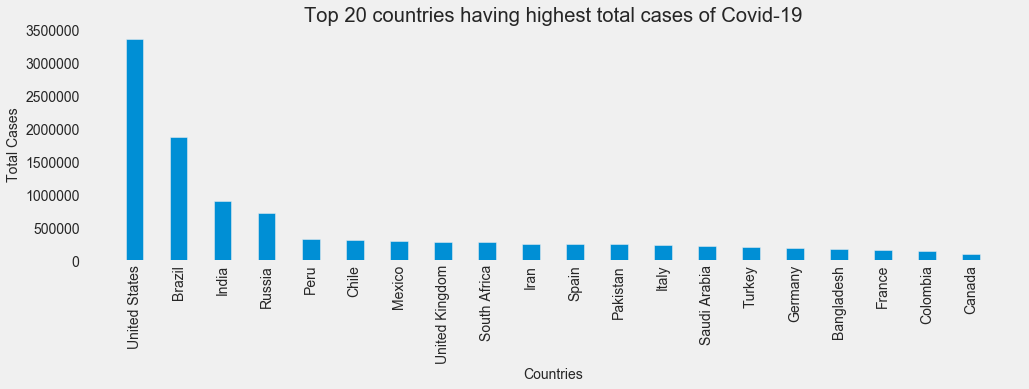

In [20]:
plt.figure(figsize=(15, 4))
plt.bar(df4['location'],df4['new_cases'],0.4)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Total Cases',fontsize=14)
plt.xticks(rotation=90)
ax = plt.gca()
ax.yaxis.grid()
ax.xaxis.grid()
plt.title('Top 20 countries having highest total cases of Covid-19')
plt.show()

# Altair

#### 3. Static Scatter Plot

In [21]:
input_dropdown = alt.binding_select(options=[None,'Africa','Asia','Europe','North America','Oceania','South America'],
                                    labels=['All','Africa','Asia','Europe','North America','Oceania','South America'])
selected_points = alt.selection_single(fields=['continent'], bind=input_dropdown, name='Select')
color = alt.condition(selected_points, alt.Color('continent:N'), alt.value('lightgray'))

alt.Chart(df2).mark_circle().encode(
    x= 'population:Q',
    y = 'new_cases:Q',
    color= color,
    tooltip=['location','continent','new_cases','new_deaths'],
).interactive().properties(width=600).add_selection(selected_points)

alt.Chart(...)

#### 4. Heatmaps

In [22]:
asia = df2[df2['continent']=='Asia']
asia = asia.rename(columns={"new_cases": "total cases", "new_deaths": "total deaths"})

In [23]:
asia.sort_values(by=['total cases'],ascending = False, inplace=True)

In [24]:
heatmap1 =alt.Chart(asia).mark_rect().encode(
    alt.X('total cases:Q',bin=True),
    alt.Y('hospital_beds_per_thousand:Q',bin=True),
    alt.Color('count()',
              scale=alt.Scale(scheme='greenblue'),
              legend=alt.Legend(title='Total Continents')
             )
).properties(width=350)

heatmap2 =alt.Chart(asia).mark_rect().encode(
    alt.X('total cases:Q',bin=True),
    alt.Y('handwashing_facilities:Q',bin=True),
    alt.Color('count()',
              scale=alt.Scale(scheme='greenblue'),
              legend=alt.Legend(title='Total Continents')
             )
).properties(width=350)

heatmap1 | heatmap2

alt.HConcatChart(...)

# Tableau - See Tableau Public Profile

### https://public.tableau.com/profile/david.vazquez3999#!/vizhome/Practice1_15938534975930/Story1?publish=yes

# Bokeh

In [25]:
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row
from bokeh.transform import factor_cmap
from bokeh.layouts import row
output_notebook()

Loading BokehJS ...

In [26]:
import pandas as pd

In [27]:
df=pd.read_csv("owid-covid-data.csv", parse_dates=['date'])

In [28]:
india=df[df["location"]=='India']
us=df[df["location"]=='United States']
italy=df[df["location"]=='Italy']
spain=df[df["location"]=='Spain']
china=df[df["location"]=='China']
france=df[df["location"]=='France']
england=df[df["location"]=='England']
brazil=df[df["location"]=='Brazil']
ecuador=df[df["location"]=='Ecuador']
mexico=df[df["location"]=='Mexico']

countries =["India", "Unites States", "Italy","Spain", "China","France","England","Brazil","Ecuador","Mexico"]

In [29]:
source_mexico = ColumnDataSource(dict(year=mexico.date, 
                                      change=mexico.total_cases, 
                                      deaths= mexico.total_deaths, 
                                      deaths_pm = mexico.total_cases_per_million, 
                                      name=mexico.location))

source_ecuador = ColumnDataSource(dict(year=ecuador.date, 
                                       change=ecuador.total_cases, 
                                       deaths= ecuador.total_deaths, 
                                       deaths_pm = ecuador.total_cases_per_million,
                                       name=ecuador.location))

source_india = ColumnDataSource(dict(year=india.date, 
                                     change=india.total_cases, 
                                     deaths= india.total_deaths, 
                                     deaths_pm = india.total_cases_per_million,
                                     name=india.location))

source_us = ColumnDataSource(dict(year=us.date, 
                                  change=us.total_cases, 
                                  deaths= us.total_deaths, 
                                  deaths_pm = us.total_cases_per_million,
                                  name=us.location))

source_italy = ColumnDataSource(dict(year=italy.date, 
                                     change=italy.total_cases, 
                                     deaths= italy.total_deaths, 
                                     deaths_pm = italy.total_cases_per_million,
                                     name=italy.location))

source_spain = ColumnDataSource(dict(year=spain.date, 
                                     change=spain.total_cases, 
                                     deaths= spain.total_deaths, 
                                     deaths_pm = spain.total_cases_per_million,
                                     name=spain.location))

source_china = ColumnDataSource(dict(year=china.date, 
                                     change=china.total_cases, 
                                     deaths= china.total_deaths,
                                     deaths_pm = china.total_cases_per_million,
                                     name=china.location))

source_france = ColumnDataSource(dict(year=france.date, 
                                      change=france.total_cases,
                                      deaths= france.total_deaths, 
                                      deaths_pm = france.total_cases_per_million,
                                      name=france.location))

source_england = ColumnDataSource(dict(year=england.date, 
                                       change=england.total_cases, 
                                       deaths= england.total_deaths, 
                                       deaths_pm = england.total_cases_per_million,
                                       name=england.location))

source_brazil = ColumnDataSource(dict(year=brazil.date, 
                                      change=brazil.total_cases, 
                                      deaths= brazil.total_deaths, 
                                      deaths_pm = brazil.total_cases_per_million,
                                      name=brazil.location))




In [30]:
TOOLTIPS = [("Total Cases", "@change"), 
            ("Total Deaths","@deaths"), 
            ('Deaths Per Million', '@deaths_pm'),
            ('Country','@name')]

r = figure(x_axis_type="datetime",
           y_axis_type='linear',
           title="Total Cases in Worst Affect Countries from January to July", 
           plot_height=450, 
           tooltips=TOOLTIPS, 
           toolbar_location="above")

r.line(x="year", y="change", 
       source=source_mexico, color='#1F78B4', 
       legend='Mexico', line_color="red", 
       line_width=3)

r.line(x="year", y="change", 
       source=source_ecuador, 
       legend='Ecuador', line_color="black", line_width=2)

r.line(x="year", y="change", source=source_india, 
       legend='India', line_color="green", line_width=2)

r.line(x="year", y="change", 
       source=source_us, legend='Trump Land', 
       line_color="orange", line_width=2)

r.line(x="year", y="change", 
       source=source_italy, legend='Italy', 
       line_color="purple", line_width=4)

r.line(x="year", y="change", source=source_spain, 
       legend='Spain', line_color="yellow", 
       line_width=2, line_dash="dashed")

r.line(x="year", y="change", 
       source=source_china, 
       legend='china', line_color="red", 
       line_width=2, line_dash="dashed")

r.line(x="year", y="change", 
       source=source_france, 
       legend='France', 
       line_color="aqua", 
       line_width=2, 
       line_dash="dashed")

r.line(x="year", y="change", source=source_england, 
       legend='England', line_color="blueviolet", 
       line_width=2, line_dash="dashed")

r.line(x="year", y="change", source=source_brazil, 
       legend='Brazil', line_color="coral", 
       line_width=2, line_dash="dashed")


r.grid.grid_line_alpha = 0.3

#Plot Frame
r.outline_line_width = 7
r.outline_line_alpha = 0.3
r.outline_line_color = "navy"

#rotation on the x axis
r.xaxis.major_label_orientation = 3.14/4

#vertical Bands
r.xgrid.band_hatch_pattern = "/"
r.xgrid.band_hatch_alpha = 0.6
r.xgrid.band_hatch_color = "lightgrey"
r.xgrid.band_hatch_weight = 0.5
r.xgrid.band_hatch_scale = 10

#Legend
r.legend.location = "top_left"
r.legend.title = 'Total Cases'
r.legend.title_text_font_style = "bold"
r.legend.title_text_font_size = "15px"

# list of all airlines in the data
from bokeh.models.widgets import CheckboxGroup
from bokeh.layouts import column, row, WidgetBox
from bokeh.models.widgets import Tabs
from bokeh.models import Panel

show(r)

In [31]:
df2=df.groupby(by=["continent"], as_index=False)[['new_cases','new_deaths','new_tests_smoothed','hospital_beds_per_thousand']].mean()
df2

continent    new_cases  new_deaths  new_tests_smoothed  \
0         Africa    93.177886    2.050107         3428.465116   
1           Asia   402.099893    9.522110        12358.247204   
2         Europe   307.996490   23.795207        14602.092128   
3  North America   882.366830   41.037572        50453.566150   
4        Oceania    10.817844    0.127323         8227.891821   
5  South America  1680.596320   61.174238         3731.238636   

   hospital_beds_per_thousand  
0                    1.507987  
1                    2.877913  
2                    5.166375  
3                    2.284478  
4                    2.950859  
5                    2.051567

In [32]:
source2 = ColumnDataSource(dict(x=df2.continent,
                                y=df2.new_cases, 
                                beds=df2.hospital_beds_per_thousand,
                               newtest=df2.new_tests_smoothed, newdeaths=df2.new_deaths))

In [33]:
TOOLTIPS=[('Average Hosp. Beds per Thousand',"@beds"), ('Average COVID-19 Tests','@newtest'),('Average Deaths','@newdeaths')]

p = figure(x_range=df2.continent ,
           plot_height=450,  title="Average New Cases per Day per Continent", 
           tooltips=TOOLTIPS,toolbar_location="above")

p.vbar(x='x', top='y', width=0.9, 
       source=source2, fill_color=factor_cmap('x', palette=Spectral6, factors=df2.continent))

p.xaxis.axis_label = 'Continent'
p.yaxis.axis_label = 'Average New Cases per Day'

p.grid.grid_line_alpha = 0.3

#rotation on the x axis
p.xaxis.major_label_orientation = 3.14/4

show(p)

In [34]:
df3=df.groupby(by=["continent","date", 'location'], as_index=False)[['new_cases']].sum()
list_negative=list(df3[df3['new_cases']<=2000].index)


In [35]:
df3 = df3.drop(df3.index[list_negative])
df3.head(2)

continent       date      location  new_cases
4505    Africa 2020-06-05  South Africa     3267.0
4560    Africa 2020-06-06  South Africa     2642.0

In [36]:
cont = list(df3.continent.unique())
cont

['Africa', 'Asia', 'Europe', 'North America', 'South America']

In [37]:
from bokeh.transform import jitter

source = ColumnDataSource(dict(continent=df3.continent, date=df3.date, cases=df3.new_cases, country=df3.location))

a = figure(plot_width=800, plot_height=300, y_range=cont, title="New Cases Density by Continent",tooltips=TOOLTIPS, x_axis_type="datetime")

TOOLTIPS = [("Country","@country"), ("New Cases","@cases")]

a.circle(x='date', y=jitter('continent', width=0.6, range=a.y_range),  source=source, alpha=0.3, fill_color=factor_cmap('continent', palette=Spectral6, factors=cont))

show(a)

In [38]:
from bokeh.layouts import gridplot

In [39]:
grid = gridplot([[r, p],[a]], plot_width=650, plot_height=550)

show(grid)

# Plotly

In [40]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime
from plotly.subplots import make_subplots
import numpy as np

In [41]:
df = pd.read_csv('owid-covid-data.csv')

In [42]:
df_latlon = pd.read_csv('Latlon.csv') 

In [43]:
def get_year(x):
    return x.split('-')[0]

In [44]:
def get_month(x):
    return x.split('-')[1]

In [45]:
def get_day(x):
    return x.split('-')[2]

In [46]:
df['year'] = df['date'].apply(get_year)

In [47]:
df['month'] = df['date'].apply(get_month)

In [48]:
df['day'] = df['date'].apply(get_day)

In [49]:
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_numeric(df['year'])
df['day'] = pd.to_numeric(df['day'])

In [50]:
df = df.dropna(subset=['total_cases','new_cases','total_deaths'])

In [51]:
df_country = df.loc[(df['location']!='World') & (df['location']!='International')]

In [52]:
df_country = pd.merge(df_country, df_latlon, how = 'left', left_on = 'location', right_on = 'name')

In [53]:
df_country = df_country.sort_values('date')

In [54]:
fig1 = px.choropleth(df_country, locations="iso_code",
                    color="total_cases",
                    color_continuous_scale=px.colors.sequential.Blues,
                    labels={'total_cases':'total cases'},
                    hover_name="location",
                    width=760, animation_frame='date')

In [55]:
fig1.update_layout(title_text = 'Choropleth Plot of Total Cases of COVID-19',
                  geo = dict(projection={'type':'natural earth'})) 
fig1.show()

In [ ]:
fig2 = px.scatter_geo(df_country, locations="iso_code", color="continent",
                     hover_name="location", size="total_cases",
                     animation_frame="date")


In [ ]:
fig2.update_layout(title_text = 'Bubble Plot of Total Cases of COVID-19',
                   geo = dict(projection={'type':'natural earth'})) 
fig2.show()

In [ ]:
df_w = df.loc[df['location']=='World']

In [ ]:
fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=list(df_w.date), 
                          y=list(df_w.new_cases),
                          name="New Cases",
                          line=dict(color="red")))

fig3.add_trace(go.Scatter(x=list(df_w.date), 
                          y=list(df_w.new_deaths),
                          name="New Deaths",
                          line=dict(color="black")))

In [ ]:
fig3.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=3,
                     label="3m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible" : [True, True]},
                          {"title" : "New Cases and Deaths of COVID 19"}],
                    label="Both",
                    method="update"
                ),
                dict(
                    args=[{"visible" : [True, False]},
                          {"title" : "New Cases of COVID 19"}],
                    label="New Cases",
                    method="update"
                ),
                dict(
                    args=[{"visible" : [False, True]},
                          {"title" : "New Deaths of COVID 19"}],
                    label="New Deaths",
                    method="update"
                )
            ])
        )],
    title_text = "New Cases and Deaths of COVID 19"
    
)

=============================

In [ ]:
con = list(df_country['continent'].unique())
col = ['red','orange','green','blue','purple','black']

In [ ]:
df_con = df.groupby(['continent','date']).sum()

In [ ]:
fig4 = make_subplots(specs=[[{"secondary_y": True}]])

for i in range(len(con)):
    df_temp = df_con.loc[con[i]]
    x = list(df_temp.index)
    y_c = list(df_temp.new_cases)
    
    fig4.add_trace(go.Scatter(x=x, 
                              y=y_c,
                              name=str(con[i]+" new cases"),
                              line=dict(color=col[i])),
                  secondary_y = False)
    
for i in range(len(con)):
    df_temp = df_con.loc[con[i]]
    x = list(df_temp.index)
    y_d = list(df_temp.new_deaths)
    fig4.add_trace(go.Scatter(x=x, 
                              y=y_d,
                              name=str(con[i]+" new deaths"),
                              line=dict(color=col[i],dash='dash')),
                  secondary_y = True)


In [ ]:
vis = []
count = 0
for i in range(6):
    ele = []
    for j in range(6):
        if j == count:
            ele.append(True)
        else:
            ele.append(False)
    count = count + 1
    vis.append(ele)

In [ ]:
fig4.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=3,
                     label="3m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible" : vis[0]+vis[0]},
                          {"title" : "New Cases and Deaths of COVID 19 of "+con[0]}],
                    label=con[0],
                    method="update"
                ),
                dict(
                    args=[{"visible" : vis[1]+vis[1]},
                          {"title" : "New Cases and Deaths of COVID 19 of "+con[1]}],
                    label=con[1],
                    method="update"
                ),
                dict(
                    args=[{"visible" : vis[2]+vis[2]},
                          {"title" : "New Cases and Deaths of COVID 19 of "+con[2]}],
                    label=con[2],
                    method="update"
                ),
                dict(
                    args=[{"visible" : vis[3]+vis[3]},
                          {"title" : "New Cases and Deaths of COVID 19 of "+con[3]}],
                    label=con[3],
                    method="update"
                ),
                dict(
                    args=[{"visible" : vis[4]+vis[4]},
                          {"title" : "New Cases and Deaths of COVID 19 of "+con[4]}],
                    label=con[4],
                    method="update"
                ),
                dict(
                    args=[{"visible" : vis[5]+vis[5]},
                          {"title" : "New Cases and Deaths of COVID 19 of "+con[5]}],
                    label=con[5],
                    method="update"
                ),
                dict(
                    args=[{"visible" : [True for x in range(12)]},
                          {"title" : "New Cases and Deaths of COVID 19 of 6 continents"}],
                    label="All",
                    method="update"
                )
            ]))
    ],
    title_text = "New Cases and Deaths of COVID 19 of 6 continents"
)

In [ ]:
fig4.show()